In [1]:
from qiskit import transpile
from qiskit_aer import Aer, AerSimulator, AerJob

def execute(circuits, backend=None, shots=1024, **kwargs):
    if backend is None:
        backend = AerSimulator()
        
    # Transpile the circuits for the backend
    transpiled_circuits = transpile(circuits, backend)
    
    # Run the circuits on the backend
    job = backend.run(transpiled_circuits, shots=shots, **kwargs)
    
    return job

backend = Aer.get_backend('statevector_simulator')

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt 
import numpy as np 
from IPython.display import display, clear_output
from math import sqrt 

## The measured qubit implementation

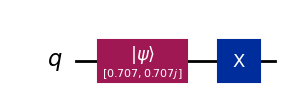

In [2]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Some state vectors
zero = np.array([1, 0])
one = np.array([0, 1])

plus = np.array([1/sqrt(2), 1/sqrt(2)])
minus = np.array([1/sqrt(2), -1/sqrt(2)])

im = np.array([1/sqrt(2), 1j/sqrt(2)])
im_minus = np.array([1/sqrt(2), -1j/sqrt(2)])

# Define initial state 
psi = np.array([1/sqrt(2), 1j/sqrt(2)])
qc.initialize(psi, 0)

# Apply the X gate
qc.x(0)
qc.draw('mpl')

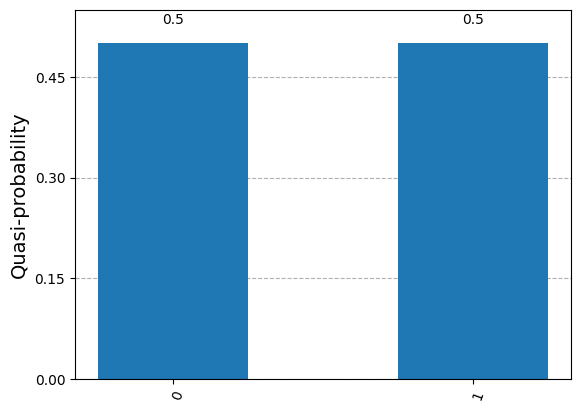

In [3]:
# Execute the simulation, returning the result
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

### Reverse Function

In [4]:
def adjust_weights(state, weights):
    return state[0]*weights[0]+state[1]*weights[1]

print('reversed psi: [{:.2f}, {:.2f}]'.format(
    adjust_weights(psi, [0,1]),
    adjust_weights(psi, [1,0])
))

reversed psi: [0.00+0.71j, 0.71+0.00j]


## The Hadamard Gate

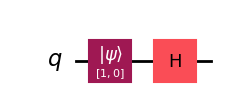

In [5]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Define initial_state as |0>
initial_state = [1,0] 
qc.initialize(initial_state, 0)

# Apply the Hadamard gate to the qubit
qc.h(0)

# Draw the quantum circuit
qc.draw('mpl')

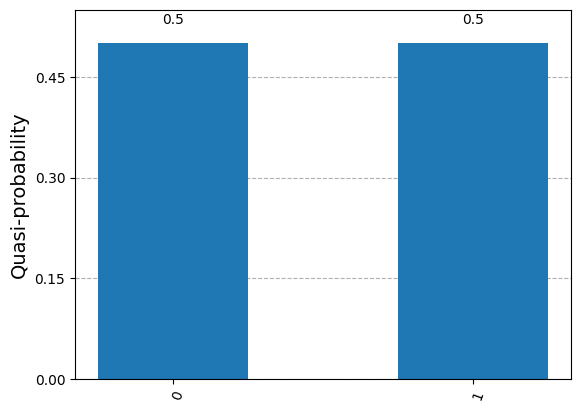

In [6]:
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator')

# Do the simulation, returning the result
result = execute(qc,backend).result() 

# get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)

#### The Hadamard Gate Reverses Itself
The Hadamard gate is a fundamental quantum gate that shows up everywhere. It transforms a qubit as follows:
$$\begin{align*} H\ket{0}&=\ket{+} \\ H\ket{1}&=\ket{-} \end{align*}$$

Moreover, the Hadamard gate can reverse these transformations (see code below).

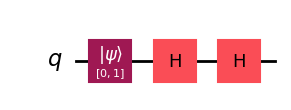

In [8]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1) 

# Define initial_state as |1>
initial_state = [0, 1] 
qc.initialize(initial_state, 0)

# apply the Hadamard gate to the qubit
qc.h(0)

# apply the Hadamard gate again to reverse it 
qc.h(0)

# Draw the quantum circuit
qc.draw('mpl')

In [ ]:
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator')

# Do the simulation, returning the result
result = execute(qc,backend).result() 

# get the probability distribution
counts = result.get_counts()

# Show the histogram
plot_histogram(counts)